# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

1.	Married applicants have a better chance of getting a loan.
2.	Are male applicants more likely to get a loan?
3.	Applicants with a credit score are more likely to get a loan.
4.	Applicants with co-applicant are more likely to get a loan.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns


In [3]:

df = pd.read_csv("../data/data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Look at some basic statistics for numerical variables.

In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)


In [7]:
#Number of applicants with credit history
count = df['Credit_History'].value_counts()
percentage = count / count.sum() * 100
credit_history = pd.concat ([count,percentage], axis = 1)
credit_history.columns = ['count', 'percentage']
credit_history

,count,percentage
1.0,475,84.219858
0.0,89,15.780142


**Aproximately the 84% of the applicants have credit history.**

2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?


In [8]:
df['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [9]:
df['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

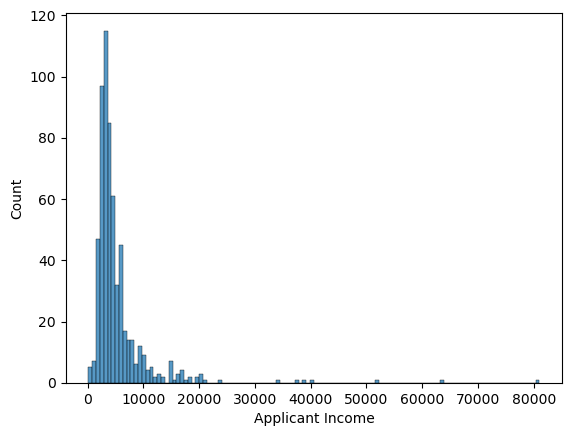

In [10]:
ax = sns.histplot(data = df, x='ApplicantIncome')
ax.set(xlabel="Applicant Income", ylabel="Count")
plt.show()

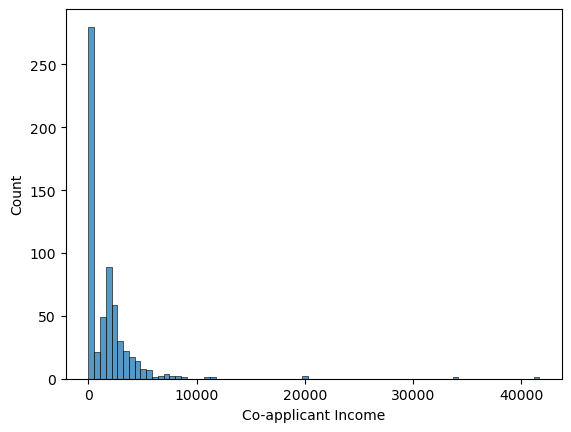

In [11]:
ax = sns.histplot(data = df, x='CoapplicantIncome')
ax.set(xlabel="Co-applicant Income", ylabel="Count")
plt.show()

- **Majority of applicants do not have a co-applicant. That is why the majority has zero value on the column coapplicant Income.**

- **For the Applicant income there are some values outside the majority (outliers). The distribution is right tailed.**


3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [12]:
mean_applicant = df['ApplicantIncome'].mean()
median_applicant = df['ApplicantIncome'].median()

In [13]:
print("Mean for applicant income:", mean_applicant)
print("Median for applicant income:", median_applicant)

Mean for applicant income: 5403.459283387622
Median for applicant income: 3812.5


- **The data is skewed and the distribution is right tailed.**

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [14]:
df.describe(exclude='number')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [15]:
df['Gender'].unique()

array(['Male', 'Female', nan], dtype=object)

In [16]:
df['Married'].unique()


array(['No', 'Yes', nan], dtype=object)

In [17]:
df['Dependents'].unique()	


array(['0', '1', '2', '3+', nan], dtype=object)

In [18]:
df['Education'].unique()


array(['Graduate', 'Not Graduate'], dtype=object)

In [19]:
df['Self_Employed'].unique()


array(['No', 'Yes', nan], dtype=object)

In [20]:
df['Property_Area'].unique()


array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [21]:
df['Loan_Status'].unique()

array(['Y', 'N'], dtype=object)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

In [22]:
df['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [23]:
df['Married'].value_counts()


Yes    398
No     213
Name: Married, dtype: int64

In [24]:
df['Dependents'].value_counts()


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [25]:
df['Education'].value_counts()


Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [26]:
df['Self_Employed'].value_counts()


No     500
Yes     82
Name: Self_Employed, dtype: int64

In [27]:
df['Property_Area'].value_counts()


Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [28]:
df['Loan_Status'].value_counts()


Y    422
N    192
Name: Loan_Status, dtype: int64

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



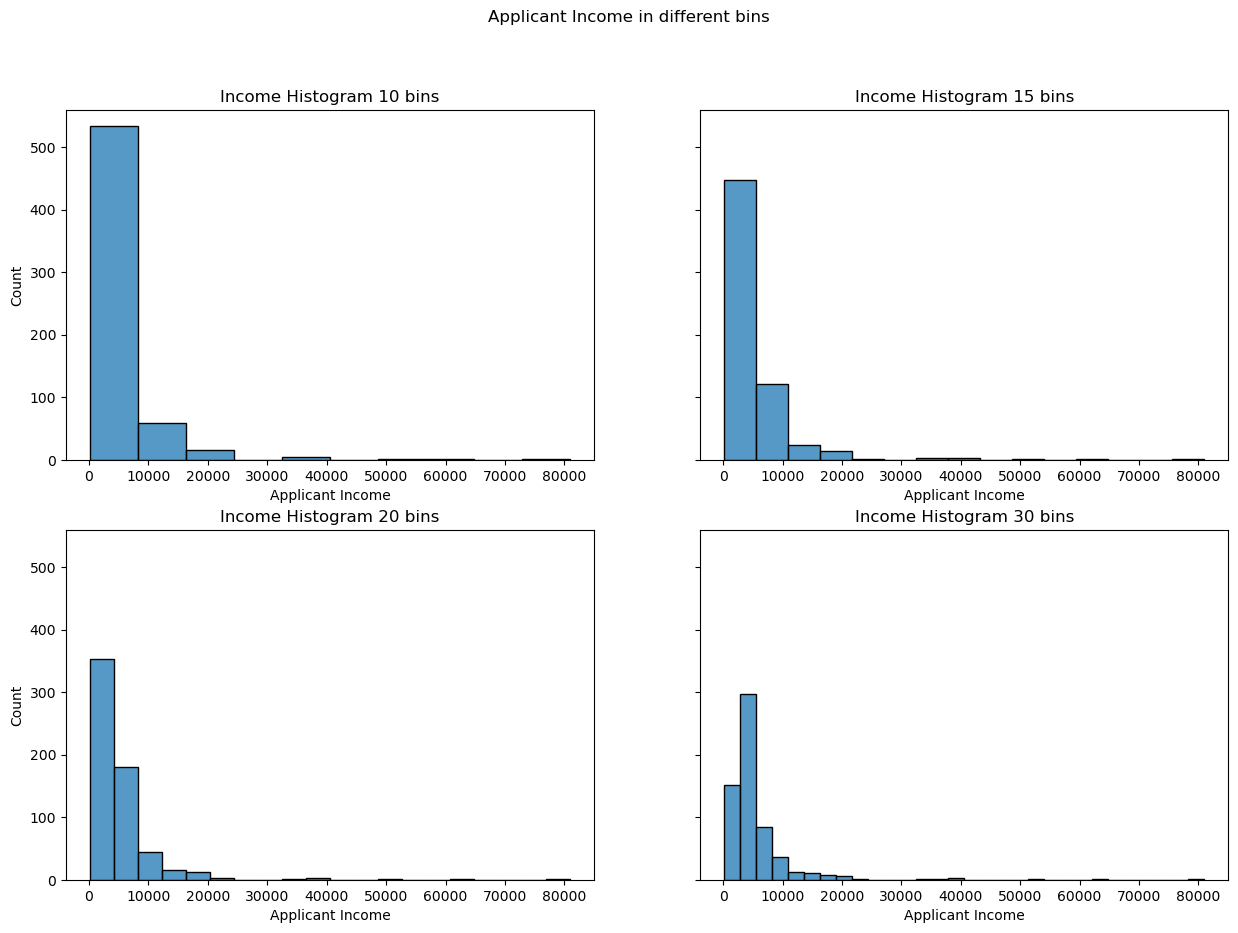

In [29]:
#Graphs ApplicantIncome
fig, ax = plt.subplots(2, 2, figsize=(15, 10), sharey=True)
fig.suptitle('Applicant Income in different bins')

sns.histplot(x='ApplicantIncome', data=df, bins=10, ax=ax[0, 0])
ax[0, 0].set(xlabel="Applicant Income", ylabel="Count")
ax[0, 0].set_title('Income Histogram 10 bins')

sns.histplot(x='ApplicantIncome', data=df, bins=15, ax=ax[0, 1])
ax[0, 1].set(xlabel="Applicant Income", ylabel="Count")
ax[0, 1].set_title('Income Histogram 15 bins')

sns.histplot(x='ApplicantIncome', data=df, bins=20, ax=ax[1, 0])
ax[1, 0].set(xlabel="Applicant Income", ylabel="Count")
ax[1, 0].set_title('Income Histogram 20 bins')

sns.histplot(x='ApplicantIncome', data=df, bins=30, ax=ax[1, 1])
ax[1, 1].set(xlabel="Applicant Income", ylabel="Count")
ax[1, 1].set_title('Income Histogram 30 bins')

plt.show()


Look at box plots to understand the distributions. 

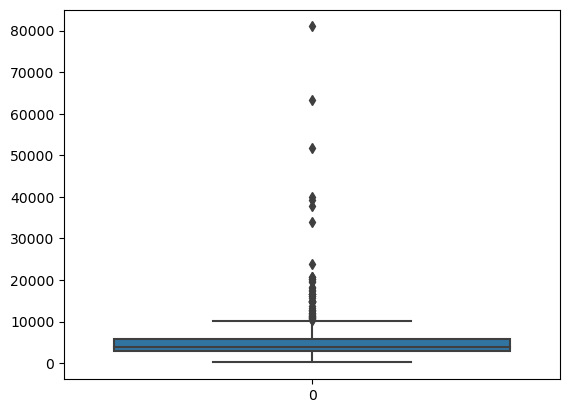

In [30]:
sns.boxplot(df['ApplicantIncome'])

plt.show()

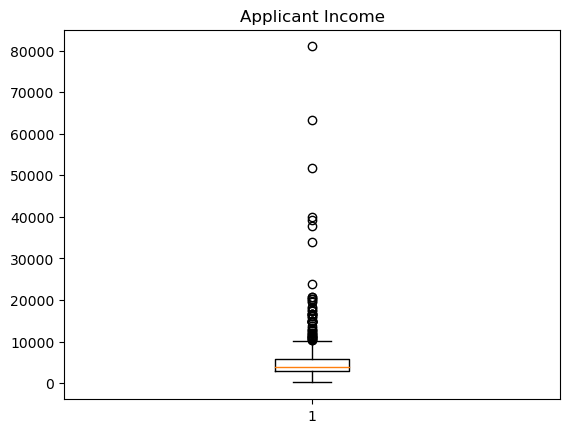

In [31]:
fig, ax = plt.subplots()

ax.boxplot(df['ApplicantIncome'])
ax.set_title('Applicant Income')
plt.show()

Look at the distribution of income segregated  by `Education`

<AxesSubplot:xlabel='Education', ylabel='ApplicantIncome'>

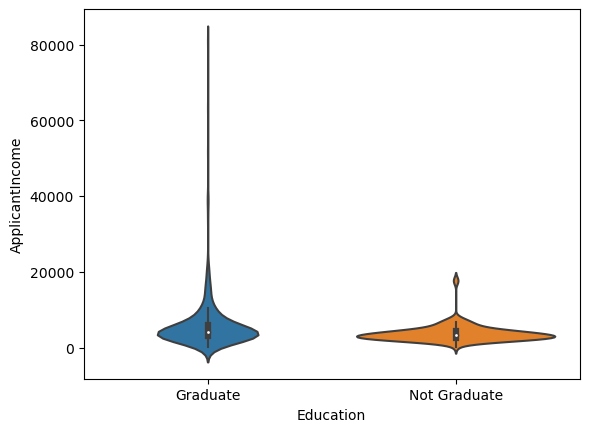

In [32]:
#violin plot to show data distribution in both categories.
sns.violinplot(x="Education", y="ApplicantIncome", data=df)

Text(0.5, 1.0, 'Education and Income Kernel')

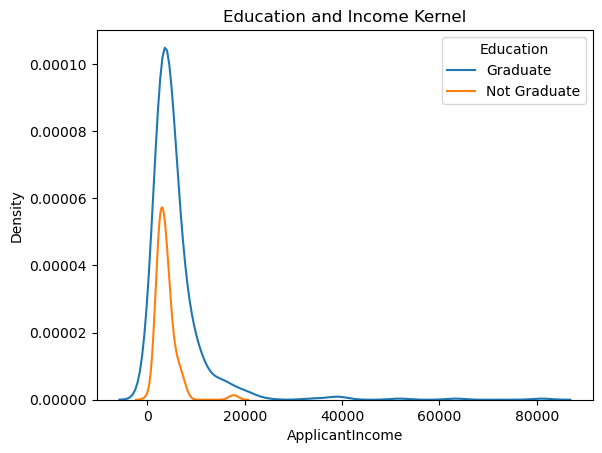

In [33]:
sns.kdeplot(x="ApplicantIncome", data=df, hue="Education")
plt.title("Education and Income Kernel")

Look at the histogram and boxplot of LoanAmount

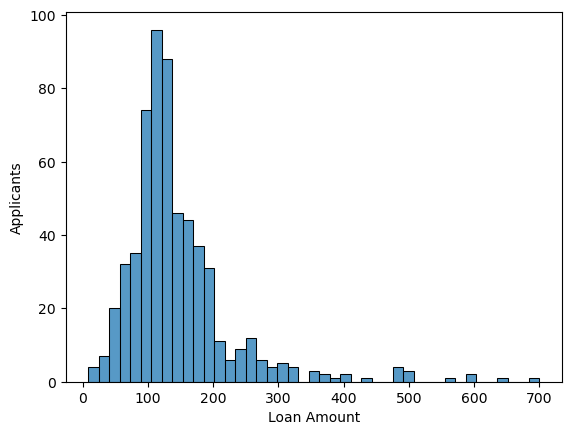

In [34]:
ax = sns.histplot(data = df, x='LoanAmount')
ax.set(xlabel="Loan Amount", ylabel="Applicants")
plt.show()

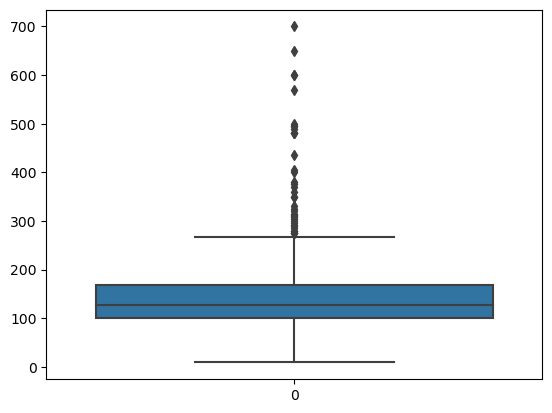

In [35]:
sns.boxplot(df['LoanAmount'])

plt.show()

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [37]:
##Aprovals by Gender
df_approvals_gender = pd.pivot_table(df, values='LoanAmount', index=['Gender'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_gender.columns =['Gender','NoApproved','Approved','Total']
df_approvals_gender['%NoApproved'] = df_approvals_gender['NoApproved'] / df_approvals_gender['Total']* 100
df_approvals_gender['%Approved']   = df_approvals_gender['Approved'] / df_approvals_gender['Total']* 100
df_approvals_gender

,Gender,NoApproved,Approved,Total,%NoApproved,%Approved
0,Female,36,73,109,33.027523,66.972477
1,Male,140,330,470,29.787234,70.212766
2,Total,176,403,579,30.397237,69.602763


In [38]:
##Approvals by Education 
df_approvals_education = pd.pivot_table(df, values='LoanAmount', index=['Education'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_education .columns =['Education','NoApproved','Approved','Total']
df_approvals_education['%NoApproved'] = df_approvals_education['NoApproved'] / df_approvals_education['Total']* 100
df_approvals_education['%Approved']   = df_approvals_education['Approved'] / df_approvals_education['Total']* 100
df_approvals_education 

,Education,NoApproved,Approved,Total,%NoApproved,%Approved
0,Graduate,134,331,465,28.817204,71.182796
1,Not Graduate,47,80,127,37.007874,62.992126
2,Total,181,411,592,30.574324,69.425676


In [43]:
##Approvals by Married
df_approvals_marital_status = pd.pivot_table(df, values='LoanAmount', index=['Married'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_marital_status.columns =['Married','NoApproved','Approved','Total']
df_approvals_marital_status['%NoApproved'] = df_approvals_marital_status['NoApproved'] / df_approvals_marital_status['Total']* 100
df_approvals_marital_status['%Approved']   = df_approvals_marital_status['Approved'] / df_approvals_marital_status['Total']* 100
df_approvals_marital_status

,Married,NoApproved,Approved,Total,%NoApproved,%Approved
0,No,75,131,206,36.407767,63.592233
1,Yes,106,278,384,27.604167,72.395833
2,Total,181,409,590,30.677966,69.322034


In [44]:
##Approvals by Dependents
df_approvals_Dependents = pd.pivot_table(df, values='LoanAmount', index=['Dependents'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_Dependents.columns =['Dependents','NoApproved','Approved','Total']
df_approvals_Dependents['%NoApproved'] = df_approvals_Dependents['NoApproved'] / df_approvals_Dependents['Total']* 100
df_approvals_Dependents['%Approved']   = df_approvals_Dependents['Approved'] / df_approvals_Dependents['Total']* 100
df_approvals_Dependents

,Dependents,NoApproved,Approved,Total,%NoApproved,%Approved
0,0,101,233,334,30.239521,69.760479
1,1,35,63,98,35.714286,64.285714
2,2,23,75,98,23.469388,76.530612
3,3+,16,33,49,32.653061,67.346939
4,Total,175,404,579,30.224525,69.775475


In [45]:
##Approvals by Self_Employed
df_approvals_self_employed = pd.pivot_table(df, values='LoanAmount', index=['Self_Employed'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_self_employed.columns =['Self_Employed','NoApproved','Approved','Total']
df_approvals_self_employed['%NoApproved'] = df_approvals_self_employed['NoApproved'] / df_approvals_self_employed['Total']* 100
df_approvals_self_employed['%Approved']   = df_approvals_self_employed['Approved'] / df_approvals_self_employed['Total']* 100
df_approvals_self_employed

,Self_Employed,NoApproved,Approved,Total,%NoApproved,%Approved
0,No,148,334,482,30.705394,69.294606
1,Yes,25,54,79,31.645570,68.354430
2,Total,173,388,561,30.837790,69.162210


In [46]:
##Approvals by Property_Area
df_approvals_self_property_area = pd.pivot_table(df, values='LoanAmount', index=['Property_Area'], columns=['Loan_Status'], aggfunc=['count'], fill_value=None, margins=True, margins_name='Total').reset_index()
df_approvals_self_property_area.columns =['PropertyArea','NoApproved','Approved','Total']
df_approvals_self_property_area['%NoApproved'] = df_approvals_self_property_area['NoApproved'] / df_approvals_self_property_area['Total']* 100
df_approvals_self_property_area['%Approved']   = df_approvals_self_property_area['Approved'] / df_approvals_self_property_area['Total']* 100
df_approvals_self_property_area

,PropertyArea,NoApproved,Approved,Total,%NoApproved,%Approved
0,Rural,66,107,173,38.150289,61.849711
1,Semiurban,53,175,228,23.245614,76.754386
2,Urban,62,129,191,32.460733,67.539267
3,Total,181,411,592,30.574324,69.425676


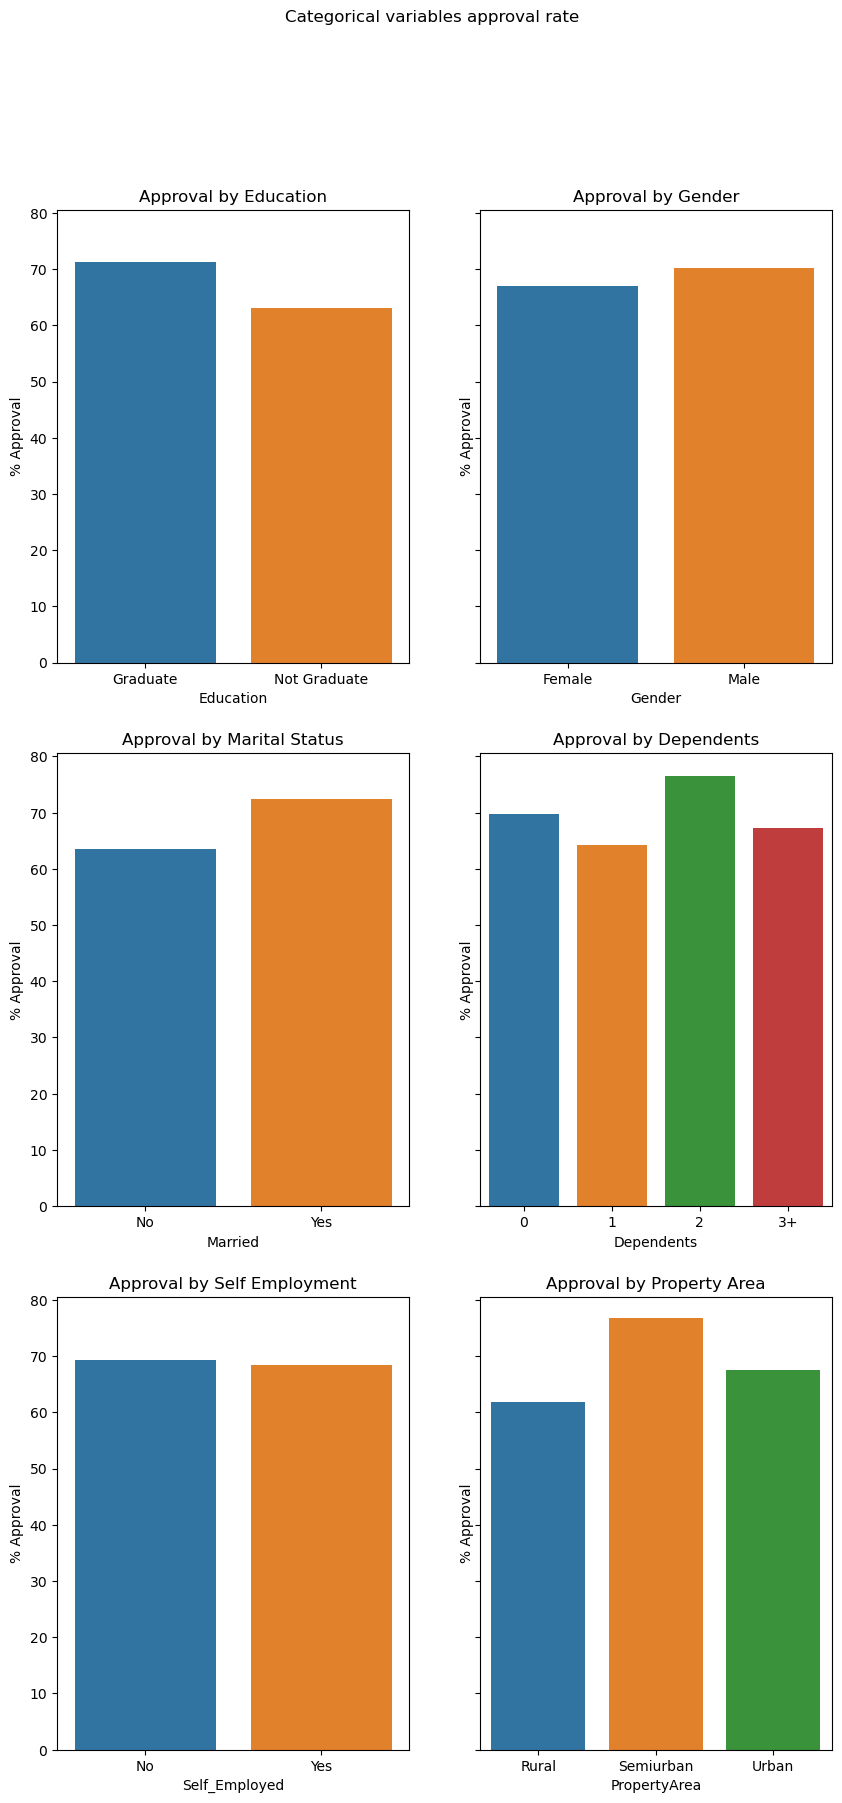

In [50]:
#Graph all the comparissons with categorical variables

fig, ax = plt.subplots(3, 2, figsize=(10, 20), sharey=True)
fig.suptitle('Categorical variables approval rate')
df_approvals_education = df_approvals_education.loc[df_approvals_education.Education !='Total']
df_approvals_gender = df_approvals_gender.loc[df_approvals_gender.Gender !='Total']
df_approvals_marital_status = df_approvals_marital_status.loc[df_approvals_marital_status.Married !='Total']
df_approvals_Dependents = df_approvals_Dependents.loc[df_approvals_Dependents.Dependents !='Total']
df_approvals_self_employed = df_approvals_self_employed.loc[df_approvals_self_employed.Self_Employed !='Total']
df_approvals_self_property_area = df_approvals_self_property_area.loc[df_approvals_self_property_area.PropertyArea !='Total']

sns.barplot(x='Education', y='%Approved', data=df_approvals_education,ax=ax[0,0])
ax[0, 0].set(ylabel="% Approval")
ax[0, 0].set_title('Approval by Education')

sns.barplot(x='Gender', y='%Approved', data=df_approvals_gender,ax=ax[0,1])
ax[0, 1].set(ylabel="% Approval")
ax[0, 1].set_title('Approval by Gender')

sns.barplot(x='Married', y='%Approved', data=df_approvals_marital_status,ax=ax[1,0])
ax[1, 0].set(ylabel="% Approval")
ax[1, 0].set_title('Approval by Marital Status')

sns.barplot(x='Dependents', y='%Approved', data=df_approvals_Dependents,ax=ax[1,1])
ax[1, 1].set(ylabel="% Approval")
ax[1, 1].set_title('Approval by Dependents')

sns.barplot(x='Self_Employed', y='%Approved', data=df_approvals_self_employed,ax=ax[2,0])
ax[2, 0].set(ylabel="% Approval")
ax[2, 0].set_title('Approval by Self Employment')

sns.barplot(x='PropertyArea', y='%Approved', data=df_approvals_self_property_area,ax=ax[2,1])
ax[2, 1].set(ylabel="% Approval")
ax[2, 1].set_title('Approval by Property Area')
#sns.histplot(x='ApplicantIncome', data=df, bins=10, ax=ax[0, 0])

plt.show()

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [ ]:
#Fill Nan values for categorical variables
df['Gender'] = df['Gender'].fillna(df['Gender'].mode().values[0])
df['Married'] = df['Married'].fillna('No') #If the status for married is empty, it's possible that the applicant is single or another not married status.
df['Dependents'] = df['Dependents'].fillna(0) #If the applicant didn't fill dependants the most logic option is that they don't have
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode().values[0])
df['Credit_History'] = df['Credit_History'].fillna(0)#I considered that the best option is not credit history for nan values

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
df['Loan_Amount_Term'].mean()

342.0

In [ ]:
df['Loan_Amount_Term'].mode()

0    360.0
Name: Loan_Amount_Term, dtype: float64

In [ ]:
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())#Decided to use the mean based on the data distribution

In [ ]:
#df['LoanAmount'].median()
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].median())

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

In [ ]:
df['LoanAmountLog'] = np.log10(df['LoanAmount'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2.107210
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2.107210
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.819544
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2.079181
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2.149219


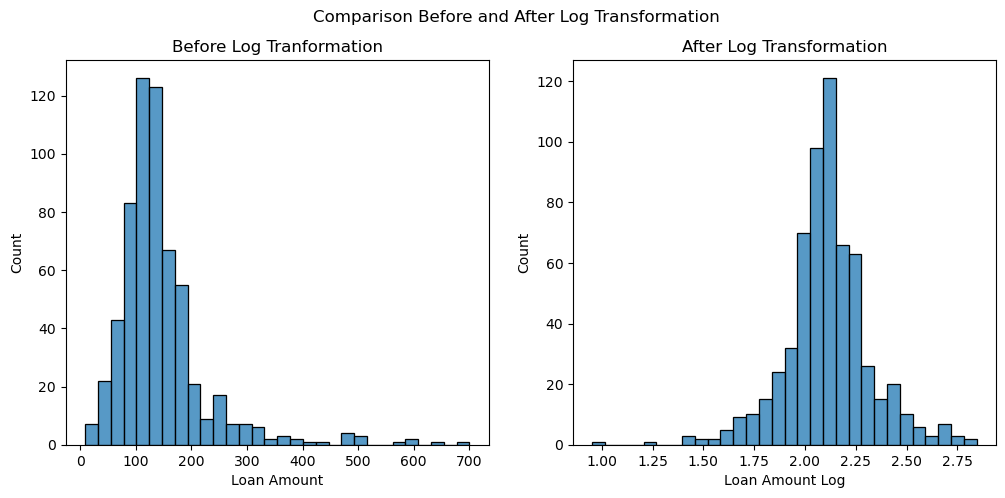

In [ ]:
#Graphs ApplicantIncome
fig, ax = plt.subplots(1, 2, figsize=(12, 5))#, sharey=True)
fig.suptitle('Comparison Before and After Log Transformation')

sns.histplot(x='LoanAmount', data=df, bins=30, ax=ax[0])
ax[0].set(xlabel="Loan Amount", ylabel="Count")
ax[0].set_title('Before Log Tranformation')

sns.histplot(x='LoanAmountLog', data=df, bins=30, ax=ax[1])
ax[1].set(xlabel="Loan Amount Log", ylabel="Count")
ax[1].set_title('After Log Transformation')



plt.show()

Combine both incomes as total income and take a log transformation of the same.

In [ ]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2.107210
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2.107210
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.819544
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2.079181
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2.149219
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,1.851258
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,1.602060
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,2.403121
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,2.271842


In [ ]:
df['Income_CombinedLog'] = np.log10(df['ApplicantIncome'] + df['CoapplicantIncome'])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Income_CombinedLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2.107210,3.767082
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2.107210,3.784689
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.819544,3.477121
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2.079181,3.693815
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2.149219,3.778151


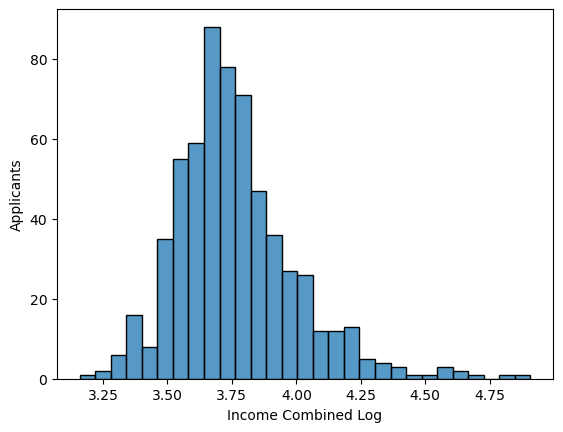

In [ ]:
ax = sns.histplot(data = df, x='Income_CombinedLog')
ax.set(xlabel="Income Combined Log", ylabel="Applicants")
plt.show()

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Income_CombinedLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,2.107210,3.767082
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,2.107210,3.784689
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,1.819544,3.477121
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,2.079181,3.693815
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,2.149219,3.778151


In [ ]:
#Transform variables for model
df = pd.get_dummies(df, columns=['Gender'], prefix='is', prefix_sep='_', drop_first=True)
#df = pd.get_dummies(df, columns=['Married'], prefix='is_married',  drop_first=True)
df['is_married'] = np.where(df['Married'] == 'Yes', 1, 0)
df = pd.get_dummies(df, columns=['Dependents'], prefix='dependents',  drop_first=True)
#df = pd.get_dummies(df, columns=['Education'], prefix='is',  drop_first=True)
df['is_graduated'] = np.where(df['Education'] == 'Graduate', 1, 0)
#df = pd.get_dummies(df, columns=['Self_Employed'], prefix='is_self_employed',  drop_first=True)
df['is_selfemployed'] = np.where(df['Self_Employed'] == 'Yes', 1, 0)
df = pd.get_dummies(df, columns = ['Property_Area'], prefix='property', drop_first=True)
df['is_approved'] = np.where(df['Loan_Status'] == 'Y', 1, 0)

df.head()

,Loan_ID,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,...,is_married,dependents_0,dependents_1,dependents_2,dependents_3+,is_graduated,is_selfemployed,property_Semiurban,property_Urban,is_approved
0,LP001002,No,Graduate,No,5849,0.0,128.0,360.0,1.0,Y,...,0,1,0,0,0,1,0,0,1,1
1,LP001003,Yes,Graduate,No,4583,1508.0,128.0,360.0,1.0,N,...,1,0,1,0,0,1,0,0,0,0
2,LP001005,Yes,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Y,...,1,1,0,0,0,1,1,0,1,1
3,LP001006,Yes,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Y,...,1,1,0,0,0,0,0,0,1,1
4,LP001008,No,Graduate,No,6000,0.0,141.0,360.0,1.0,Y,...,0,1,0,0,0,1,0,0,1,1


In [ ]:
df_model = df.drop(columns=['Loan_ID','Married','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','Loan_Status']) 
df_model.head()

,LoanAmount,Loan_Amount_Term,Credit_History,LoanAmountLog,Income_CombinedLog,is_Male,is_married,dependents_0,dependents_1,dependents_2,dependents_3+,is_graduated,is_selfemployed,property_Semiurban,property_Urban,is_approved
0,128.0,360.0,1.0,2.107210,3.767082,1,0,1,0,0,0,1,0,0,1,1
1,128.0,360.0,1.0,2.107210,3.784689,1,1,0,1,0,0,1,0,0,0,0
2,66.0,360.0,1.0,1.819544,3.477121,1,1,1,0,0,0,1,1,0,1,1
3,120.0,360.0,1.0,2.079181,3.693815,1,1,1,0,0,0,0,0,0,1,1
4,141.0,360.0,1.0,2.149219,3.778151,1,0,1,0,0,0,1,0,0,1,1


## 4. Building a Predictive Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold

In [ ]:
#Prepare data for variables
tsize = 0.2
rstate = 25
X = df_model.drop(['is_approved'], axis=1)
y = df_model['is_approved']

# Initialize the StandardScaler
scaler = StandardScaler()

# Scale the selected columns
X_scaled = scaler.fit_transform(X)


In [ ]:
#Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=tsize, random_state=rstate)

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
#Predictions
y_pred = rfc.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 72.36%
Precision: 69.50%
Recall: 67.46%
F1 score: 68.09%


Try paramater grid search to improve the results

In [ ]:
#Define Hyper parameters
param_grid = {
    'n_estimators': [10, 50, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Create a GridSearchCV object and fit it to the training data
grid_search = GridSearchCV(rfc, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy score: {:.2f}%".format(grid_search.best_score_ * 100))

Best hyperparameters:  {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50}
Best accuracy score: 75.96%


## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [62]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import GridSearchCV, train_test_split


In [54]:
df_p = pd.read_csv("../data/data.csv")
df_p

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [55]:
df_p = df_p.drop('Loan_ID',axis=1)


In [56]:
numeric_transform = Pipeline([('impute_mean', SimpleImputer(strategy='mean')), 
                              ('scaling', StandardScaler())])
categorical_transform = Pipeline([('impute_mode', SimpleImputer(strategy='most_frequent')), 
                                  ('one-hot-encode', OneHotEncoder(sparse=False))])
amount_transform = Pipeline([("impute_mean", SimpleImputer(strategy='mean')),("log_transform", PowerTransformer())])


In [57]:
data_processing = ColumnTransformer([('numeric',numeric_transform,['Loan_Amount_Term']),
                                     ('categorical',categorical_transform,['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']),
                                     #('sumcolumns',sum_columnsp,['ApplicantIncome','CoapplicantIncome']),
                                     #('columndroper', column_dropper,['ApplicantIncome','CoapplicantIncome']),
                                     ('amount', amount_transform,['ApplicantIncome','CoapplicantIncome','LoanAmount'] )])
#columns_processing = ColumnTransformer([('sumcolumns',sum_columnsp,['ApplicantIncome','CoapplicantIncome']),
#                                        ('columndroper', column_dropper,['ApplicantIncome','CoapplicantIncome'])])                                     

In [58]:
feature_union = FeatureUnion([('pca', PCA(n_components=2)), 
                              ('select_best', SelectKBest(k=3))])
model = RandomForestClassifier(criterion='gini',max_depth=None, min_samples_leaf = 4, min_samples_split=2,n_estimators=10)

In [59]:
pipeline = Pipeline(steps=[('preprocessing', data_processing),
                            ('scaling', StandardScaler()),
                           ('features', feature_union),
                           ('classifier', model)])


In [60]:
X = df_p.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [63]:
tsize = 0.2
rstate = 25
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tsize, random_state=rstate)

In [64]:
pipeline.fit(X_train, y_train)


/opt/homebrew/Caskroom/miniforge/base/envs/THE_ONE/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Loan_Amount_Term']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_mode',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one-hot-encode',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Edu...
                                                  Pipeline(steps=[('impute_mean',
                                                                   SimpleImputer()),
                                                                  ('log_transform',
                                                                   PowerTransformer())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount'])])),
                ('scaling', StandardScaler()),
                ('features',
                 FeatureUnion(transformer_list=[('pca', PCA(n_components=2)),
                                                ('select_best',
                                                 SelectKBest(k=3))])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, n_estimators=10))])

In [ ]:

y_pred = pipeline.predict(X_test)
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Accuracy: {:.2f}%".format(acc * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 score: {:.2f}%".format(f1 * 100))

Accuracy: 80.49%
Precision: 83.29%
Recall: 73.71%
F1 score: 75.61%


In [ ]:
#Save Pickle

import pickle
model_columns = list(X.columns)
with open('../data/model_columns.pkl', 'wb') as file:
    pickle.dump(model_columns, file)
    
pickle.dump(pipeline, open('../data/classifier.pkl', 'wb'))

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [ ]:
## Test locally
import requests as r
import pandas as pd
import json
import json


base_url = 'http://127.0.0.1:5000/' #base url local host

json_data = {
        "Gender": 'Female',
        "Married": 'No',
        "Dependents": '0',
        "Education": 'Graduate',
        "Self_Employed": 'No',
        "ApplicantIncome": 1500,
        "CoapplicantIncome": 2000,
        "LoanAmount": 25,
        "Loan_Amount_Term": 60,
        "Credit_History": 1,
        "Property_Area": 'Urban'
        }

# Get Response
# response = r.get(base_url)
response = r.post(base_url + "predict", json = json_data)


if response.status_code == 200:
    print('...')
    print('request successful')
    print('...')
    print(response.json())
else:
    print(response.json())
    print('request failed')

...
request successful
...
{'prediction': "['Y']"}


In [ ]:
## Test locally
import requests as r
import pandas as pd
import json
import json


base_url = 'http://127.0.0.1:5000/' #base url local host

json_data = {
        "Gender": 'Male',
        "Married": 'Yes',
        "Dependents": '1',
        "Education": 'Graduate',
        "Self_Employed": 'No',
        "ApplicantIncome": 2500,
        "CoapplicantIncome": 2600,
        "LoanAmount": 28,
        "Loan_Amount_Term": 120,
        "Credit_History": 1,
        "Property_Area": 'Rural'
        }

# Get Response
# response = r.get(base_url)
response = r.post(base_url + "predict", json = json_data)


if response.status_code == 200:
    print('...')
    print('request successful')
    print('...')
    print(response.json())
else:
    print(response.json())
    print('request failed')

...
request successful
...
{'prediction': "['Y']"}
